# Label a subset of a lidar point cloud

This notebook is a companion to the [lidar.ipynb](lidar.ipynb) notebook. It shows how to select a subset of a lidar point cloud and save it to numpy file. The subset is selected by specifying a bounding box in the natural coordinates of the point cloud.

You may use this notebook in order to select new subsets of the lidar point cloud and use them in the [lidar.ipynb](lidar.ipynb) notebook. You may also use it to select subsets of the lidar point cloud for other purposes.

Made by Leonard Seydoux in May 2023.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import lidar

%config InlineBackend.figure_format = "svg"
%config InlineBackend.rc = {"figure.dpi": 300}

## Load the data

The entire scene contains more than 18 million points. This is too much to be displayed in a single plot. We can use the `lidar` module to load the data and plot a subset of the points. After reading the entire scene with the `lidar.read_las` function, you can use the `lidar.show_scene` function to show the scene. Note that the `show_scene` function takes a `n_points` parameter that allows to specify the number of points to display (randomly sampled). This is useful to speed up the plotting and to get a better understanding of the scene.

> __Note__: The number of points `n_points`, point size `s` and transparency `alpha` are parameters that can be tuned to get a better visualization of the scene. These values were calibrated on a different computer, so you may need to adjust them to get a better visualization.

Number of forest points: 372,715
Number of building points: 340,486
Number of ground points: 140,477
Number of grass points: 27,382


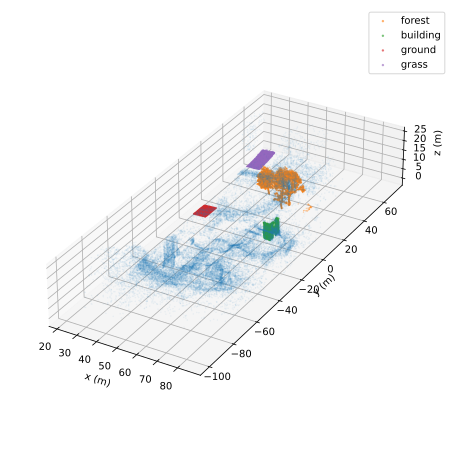

In [12]:
# Read the whole dataset
scene = lidar.read_las("data/unlabeled/scene.las")

# Extract points
x = scene[:, 0]
y = scene[:, 1]
z = scene[:, 2]

# Category bounding boxes
categories = {
    "forest": (30, 70, 20, 30, 3, 30),
    "building": (65, 69, -10, 0, 4, 12),
    "ground": (20, 30, 0, 10, 0, 5),
    "grass": (20, 30, 50, 70, -1, 4),
}

# Plot the scene
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")

# Plot the scene
lidar.plot_scene(scene, s=0.1, alpha=0.1, n_points=40000, ax=ax)

# Extract points from each category
for category, bounds in categories.items():

    # Select the points that belong to the category
    x_min, x_max, y_min, y_max, z_min, z_max = bounds

    # Select points
    mask = (
        (x > x_min)
        & (x < x_max)
        & (y > y_min)
        & (y < y_max)
        & (z > z_min)
        & (z < z_max)
    )
    points = scene[mask]

    # Print number of points
    print(f"Number of {category} points: {points.shape[0]:,}")

    # Plot the points
    lidar.plot_scene(points, s=0.1, alpha=0.5, ax=ax, label=category)

    # Save the points
    np.save(f"{category}.npy", points)

# Add legend
ax.legend(markerscale=5)

# Show
plt.show()


<center><img src="https://s3.glicid.fr/nuts/workshop-footer.svg"/></center>